In [14]:
# Install a pip package in the current Jupyter kernel
# In case you don't have the packages installed, uncomment the following lines and run them ;)

# import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install scipy
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install kneebow

In [1]:
#Basic Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneebow.rotor import Rotor

In [2]:
#Extracting the Dataframe from the .csv file
df = pd.read_csv("Mall_Customers.csv")

#Storing only the Annual Income and Spending Score values
df = df.iloc[:,[3,4]].values

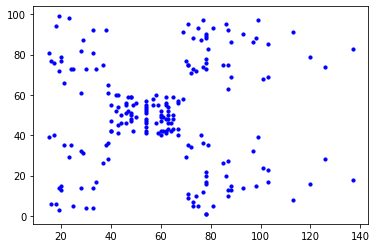

In [3]:
#In here, we compute a plot that allow us to make an overview of our dataset
plt.scatter(df[:,0], df[:,1], s=10, c= "blue")

In [15]:
#We calculate or k-distance for determinate our eps value.
def calculate_kn_distance(X, neigh=2):
    neigh = NearestNeighbors(n_neighbors=neigh)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    return distances[:,1:].reshape(-1)

#We get the eps exact value using kneebow, this function allows
#us to find the elbow of a curve by rotating the curve and taking
#the minimum value.
def get_eps(X, neigh=2):
    eps_dist = np.sort(calculate_kn_distance(X, neigh=neigh))
    rotor = Rotor()
    curve_xy = np.concatenate([np.arange(eps_dist.shape[0]).reshape(-1, 1), eps_dist.reshape(-1, 1)],1)
    rotor.fit_rotate(curve_xy)
    rotor.plot_elbow()
    e_idx = rotor.get_elbow_index()
    return curve_xy[e_idx]

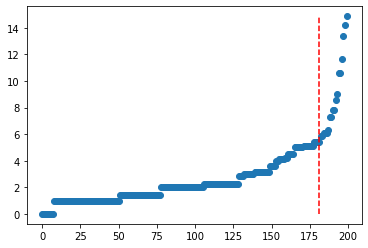

5.385164807134504


In [33]:
#Calling our main function
idx, eps = get_eps(df)

#Showing the rotated version used for find the elbow.
plt.show()

#Printing the exact values of our eps, from here we will round it
#and use it for our DBSCAN method.
print(eps)

In [34]:
#We compute the DBSCAN giving as parameters our calculated
#eps value and estimated minPoints
clusters = DBSCAN(eps=5, min_samples=5).fit(df)

#We label each datapoint in a cluster, going from -1 (noises)
#to 4 (our last visited cluster)
labels = clusters.labels_

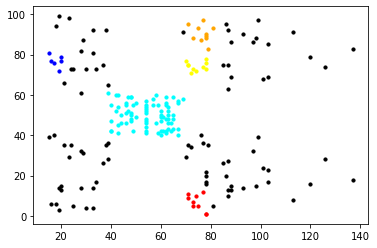

In [32]:
#We make our plot by adding different colors for each label.
plt.scatter(df[labels == -1, 0 ], df[labels == -1, 1], s = 10, c = 'black' )
plt.scatter(df[labels == 0, 0 ], df[labels == 0, 1], s = 10, c = 'blue' )
plt.scatter(df[labels == 1, 0 ], df[labels == 1, 1], s = 10, c = 'cyan' )
plt.scatter(df[labels == 2, 0 ], df[labels == 2, 1], s = 10, c = 'yellow' )
plt.scatter(df[labels == 3, 0 ], df[labels == 3, 1], s = 10, c = 'red' )
plt.scatter(df[labels == 4, 0 ], df[labels == 4, 1], s = 10, c = 'orange' )
plt.show()